In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('./creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.dropna(inplace=True)
# no null values

In [6]:
df.shape

(284807, 31)

## Check for correlation or feature selection

In [7]:
x = df.iloc[:,0:30]
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [8]:
y=df.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

In [10]:
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [11]:
print(model.feature_importances_)

[0.01566601 0.01360647 0.01507253 0.02994458 0.03981385 0.01458759
 0.01238573 0.02756528 0.01490614 0.03671107 0.06651852 0.07022214
 0.10467661 0.01217856 0.1330989  0.01301247 0.04961057 0.1384699
 0.04984136 0.01707251 0.01382472 0.0157297  0.01259897 0.00988621
 0.01161023 0.01067992 0.01431417 0.0119252  0.01211078 0.01235931]


In [12]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances

Time      0.015666
V1        0.013606
V2        0.015073
V3        0.029945
V4        0.039814
V5        0.014588
V6        0.012386
V7        0.027565
V8        0.014906
V9        0.036711
V10       0.066519
V11       0.070222
V12       0.104677
V13       0.012179
V14       0.133099
V15       0.013012
V16       0.049611
V17       0.138470
V18       0.049841
V19       0.017073
V20       0.013825
V21       0.015730
V22       0.012599
V23       0.009886
V24       0.011610
V25       0.010680
V26       0.014314
V27       0.011925
V28       0.012111
Amount    0.012359
dtype: float64

In [13]:
feat_importances.nlargest(12)

V17    0.138470
V14    0.133099
V12    0.104677
V11    0.070222
V10    0.066519
V18    0.049841
V16    0.049611
V4     0.039814
V9     0.036711
V3     0.029945
V7     0.027565
V19    0.017073
dtype: float64

In [14]:
correlation=df.corr()
print(correlation['Class'].sort_values(ascending=False))

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [15]:
#best feature with correlation
df1=df[['V12','V17','V18','V10','V11','V14','V16','V9','V3','V4','V7','Time','Class']]
df1

,V12,V17,V18,V10,V11,V14,V16,V9,V3,V4,V7,Time,Class
0,-0.617801,0.207971,0.025791,0.090794,-0.551600,-0.311169,-0.470401,0.363787,2.536347,1.378155,0.239599,0.0,0
1,1.065235,-0.114805,-0.183361,-0.166974,1.612727,-0.143772,0.463917,-0.255425,0.166480,0.448154,-0.078803,0.0,0
2,0.066084,1.109969,-0.121359,0.207643,0.624501,-0.165946,-2.890083,-1.514654,1.773209,0.379780,0.791461,1.0,0
3,0.178228,-0.684093,1.965775,-0.054952,-0.226487,-0.287924,-1.059647,-1.387024,1.792993,-0.863291,0.237609,1.0,0
4,0.538196,-0.237033,-0.038195,0.753074,-0.822843,-1.119670,-0.451449,0.817739,1.548718,0.403034,0.592941,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,2.711941,1.991691,0.510632,4.356170,-1.593105,4.626942,1.107641,1.914428,-9.834783,-2.066656,-4.918215,172786.0,0
284803,0.915802,-0.025693,-1.221179,-0.975926,-0.150189,-0.675143,-0.711757,0.584800,2.035030,-0.738589,0.024330,172787.0,0
284804,0.063119,0.313502,0.395652,-0.484782,0.411614,-0.510602,0.140716,0.432454,-3.249640,-0.557828,-0.296827,172788.0,0
284805,-0.962886,0.509928,1.113981,-0.399126,-1.933849,0.449624,-0.608577,0.392087,0.702510,0.689799,-0.686180,172788.0,0


## Check for outliers 

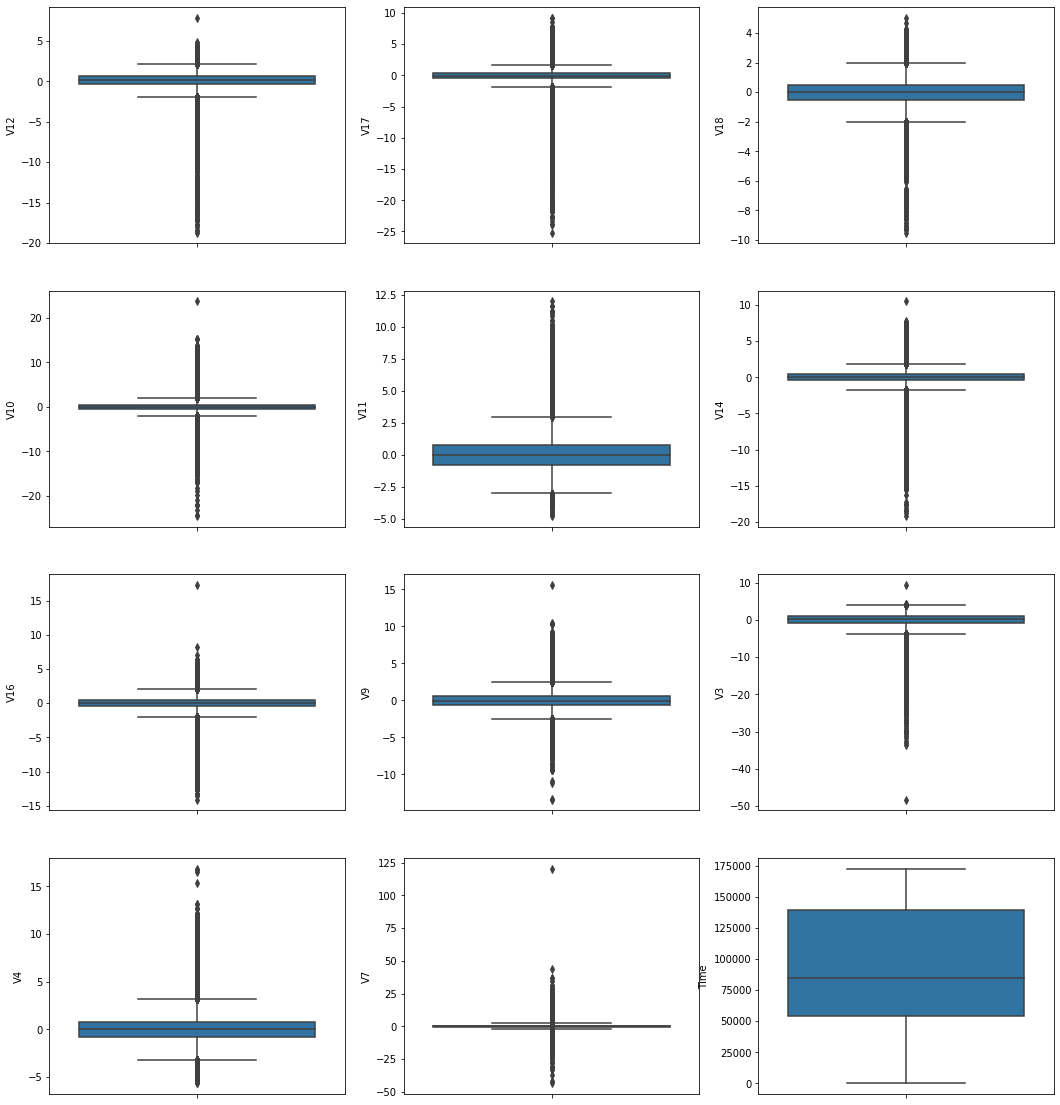

In [16]:
fig,ax=plt.subplots(nrows=4,ncols=3,figsize=(18,20))
sns.boxplot(data=df1,y='V12',ax=ax[0][0])
sns.boxplot(data=df1,y='V17',ax=ax[0][1])
sns.boxplot(data=df1,y='V18',ax=ax[0][2])
sns.boxplot(data=df1,y='V10',ax=ax[1][0])
sns.boxplot(data=df1,y='V11',ax=ax[1][1])
sns.boxplot(data=df1,y='V14',ax=ax[1][2])
sns.boxplot(data=df1,y='V16',ax=ax[2][0])
sns.boxplot(data=df1,y='V9',ax=ax[2][1])
sns.boxplot(data=df1,y='V3',ax=ax[2][2])
sns.boxplot(data=df1,y='V4',ax=ax[3][0])
sns.boxplot(data=df1,y='V7',ax=ax[3][1])
sns.boxplot(data=df1,y='Time',ax=ax[3][2])

## Removing the outliers 

### Droping outliers of V12

In [17]:
quantile1, quantile3= np.percentile(df1['V12'],[25,75])
print(quantile1)
print(quantile3)

-0.40557148544041355
0.6182380329461361


In [18]:
iqr=quantile3-quantile1
iqr

1.0238095183865497

In [19]:
lb=quantile1-(3*iqr)
ub=quantile3+(3*iqr)
print(lb)
print(ub)

-3.4770000406000623
3.6896665881057853


In [20]:
df1.drop(df1[df1['V12']>ub].index,axis=0,inplace=True)

/home/s0umyajit/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
df1.shape

(284745, 13)

In [22]:
df1.drop(df1[df1['V12']<lb].index,axis=0,inplace=True)
df1.shape

(283502, 13)

### Droping outliers of V10

In [23]:
quantile1, quantile3= np.percentile(df1['V10'],[25,75])
print(quantile1)
print(quantile3)

-0.5329420709457295
0.454234850440027


In [24]:
iqr=quantile3-quantile1
iqr

0.9871769213857565

In [25]:
lb=quantile1-(3*iqr)
ub=quantile3+(3*iqr)
print(lb)
print(ub)

-3.494472835102999
3.4157656145972966


In [26]:
df1.drop(df1[df1['V10']>ub].index,axis=0,inplace=True)

In [27]:
df1.shape

(280889, 13)

In [28]:
df1.drop(df1[df1['V10']<lb].index,axis=0,inplace=True)
df1.shape

(280684, 13)

 ### Droping outliers of V3

In [29]:
quantile1,quantile3=np.percentile(df1['V3'],[25,75])
print(quantile1)
print(quantile3)

-0.864518612980335
1.03161069632272


In [30]:
iqr=quantile3-quantile1
iqr

1.8961293093030551

In [31]:
lb=quantile1-(3*iqr)
ub=quantile3+(3*iqr)
print(lb)
print(ub)

-6.5529065408895
6.719998624231885


In [32]:
df1.drop(df1[df1['V3']<lb].index,axis=0,inplace=True)

In [33]:
df1.shape

(280308, 13)

### Droping outliers of V16

In [34]:
quantile1, quantile3= np.percentile(df1['V16'],[25,75])
print(quantile1)
print(quantile3)

-0.46064840689351705
0.5221471351789807


In [35]:
iqr=quantile3-quantile1
iqr

0.9827955420724978

In [36]:
lb=quantile1-(3*iqr)
ub=quantile3+(3*iqr)
print(lb)
print(ub)

-3.40903503311101
3.470533761396474


In [37]:
df1.drop(df1[df1['V16']>ub].index,axis=0,inplace=True)

In [38]:
df1.drop(df1[df1['V16']<lb].index,axis=0,inplace=True)

In [39]:
df1.shape

(280092, 13)

### Droping outliers of V9

In [40]:
quantile1, quantile3= np.percentile(df1['V9'],[25,75])
print(quantile1)
print(quantile3)
iqr=quantile3-quantile1
print(iqr)
lb=quantile1-(3*iqr)
ub=quantile3+(3*iqr)
print(lb)
print(ub)

-0.6474019431487315
0.5743459080204465
1.221747851169178
-4.312645496656265
4.239589461527981


In [41]:
df1.drop(df1[df1['V9']>ub].index,axis=0,inplace=True)
df1.shape

(280012, 13)

In [42]:
df1.drop(df1[df1['V9']<lb].index,axis=0,inplace=True)
df1.shape

(280011, 13)

### Droping outliers of V17

In [43]:
quantile1, quantile3= np.percentile(df1['V17'],[25,75])
print(quantile1)
print(quantile3)
iqr=quantile3-quantile1
print(iqr)
lb=quantile1-(3*iqr)
ub=quantile3+(3*iqr)
print(lb)
print(ub)

-0.4796270525012605
0.3951250463403195
0.87475209884158
-3.1038833490260003
3.019381342865059


In [44]:
df1.drop(df1[df1['V17']>ub].index,axis=0,inplace=True)
df1.shape

(279174, 13)

In [45]:
df1.drop(df1[df1['V17']<lb].index,axis=0,inplace=True)
df1.shape

(279144, 13)

### Droping outliers of V4

In [46]:
quantile1, quantile3= np.percentile(df1['V4'],[25,75])
print(quantile1)
print(quantile3)
iqr=quantile3-quantile1
print(iqr)
lb=quantile1-(3*iqr)
ub=quantile3+(3*iqr)
print(lb)
print(ub)

-0.8381042686817366
0.7302376077647813
1.5683418764465178
-5.543129898021291
5.435263237104335


In [47]:
df1.drop(df1[df1['V4']>ub].index,axis=0,inplace=True)
df1.shape

(278983, 13)

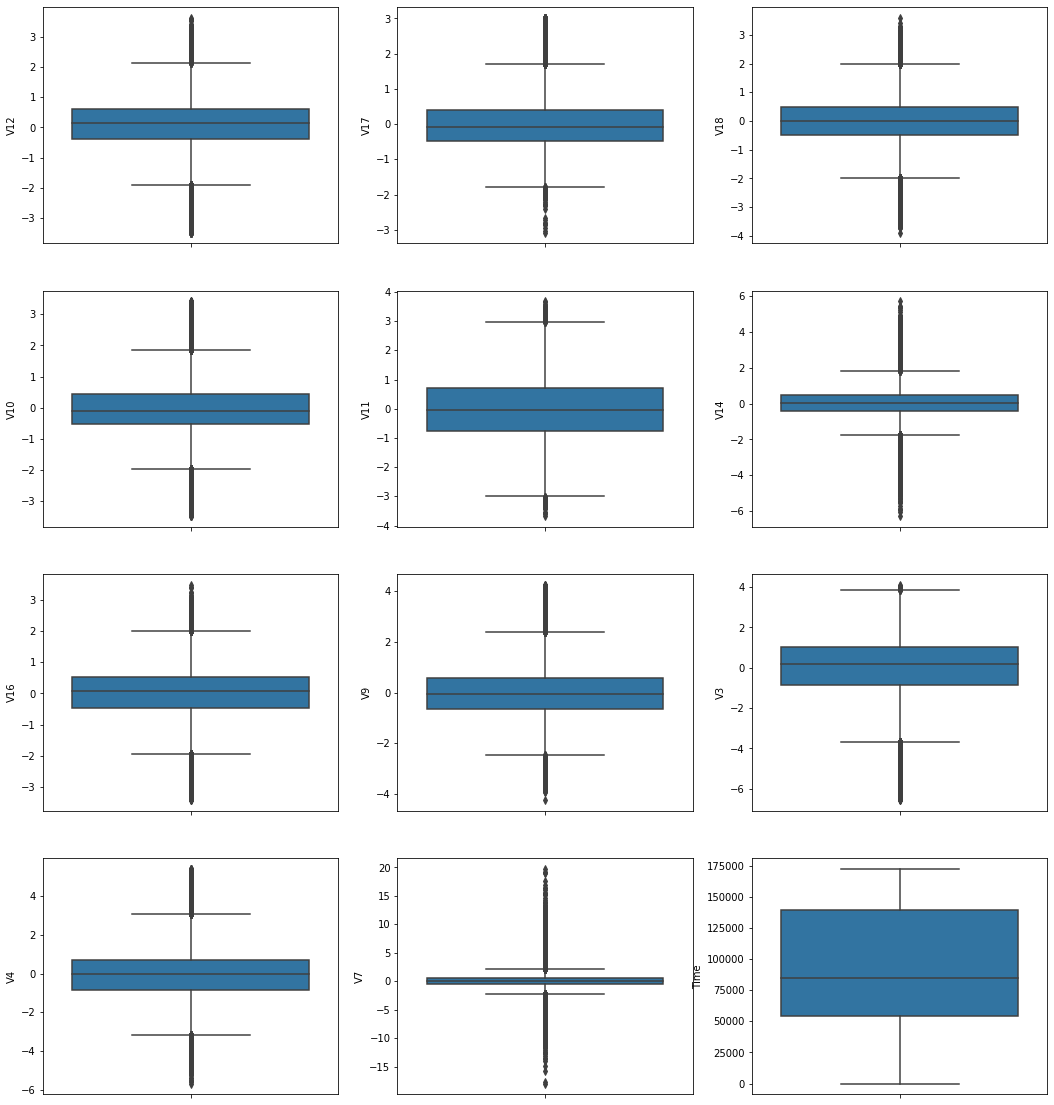

In [48]:
fig,ax=plt.subplots(nrows=4,ncols=3,figsize=(18,20))
sns.boxplot(data=df1,y='V12',ax=ax[0][0])
sns.boxplot(data=df1,y='V17',ax=ax[0][1])
sns.boxplot(data=df1,y='V18',ax=ax[0][2])
sns.boxplot(data=df1,y='V10',ax=ax[1][0])
sns.boxplot(data=df1,y='V11',ax=ax[1][1])
sns.boxplot(data=df1,y='V14',ax=ax[1][2])
sns.boxplot(data=df1,y='V16',ax=ax[2][0])
sns.boxplot(data=df1,y='V9',ax=ax[2][1])
sns.boxplot(data=df1,y='V3',ax=ax[2][2])
sns.boxplot(data=df1,y='V4',ax=ax[3][0])
sns.boxplot(data=df1,y='V7',ax=ax[3][1])
sns.boxplot(data=df1,y='Time',ax=ax[3][2])

In [49]:
df1['Class'].value_counts()

0    278901
1        82
Name: Class, dtype: int64

### As it is an inbalanced dataset oversampling has to be done.

In [50]:
df1.head()

,V12,V17,V18,V10,V11,V14,V16,V9,V3,V4,V7,Time,Class
0,-0.617801,0.207971,0.025791,0.090794,-0.551600,-0.311169,-0.470401,0.363787,2.536347,1.378155,0.239599,0.0,0
1,1.065235,-0.114805,-0.183361,-0.166974,1.612727,-0.143772,0.463917,-0.255425,0.166480,0.448154,-0.078803,0.0,0
2,0.066084,1.109969,-0.121359,0.207643,0.624501,-0.165946,-2.890083,-1.514654,1.773209,0.379780,0.791461,1.0,0
3,0.178228,-0.684093,1.965775,-0.054952,-0.226487,-0.287924,-1.059647,-1.387024,1.792993,-0.863291,0.237609,1.0,0
4,0.538196,-0.237033,-0.038195,0.753074,-0.822843,-1.119670,-0.451449,0.817739,1.548718,0.403034,0.592941,2.0,0


In [51]:
x=[]
for i in df1.columns:
    if(i!='Class'):
        x.append(i)
    else:
        continue
x

['V12',
 'V17',
 'V18',
 'V10',
 'V11',
 'V14',
 'V16',
 'V9',
 'V3',
 'V4',
 'V7',
 'Time']

In [52]:
X=df1[['V12',
 'V17',
 'V18',
 'V10',
 'V11',
 'V14',
 'V16',
 'V9',
 'V3',
 'V4',
 'V7',
 'Time']]
X.shape

(278983, 12)

In [53]:
Y=df1['Class']
Y

0         0
1         0
2         0
3         0
4         0
         ..
284801    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 278983, dtype: int64